In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [2]:
X = pd.read_csv("regular_season_results.csv")

In [3]:
X.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,A,16,511,91,647,57,H,NaN
1,A,16,515,75,812,67,H,NaN
2,A,16,606,87,658,67,H,NaN
3,A,16,670,73,573,65,H,NaN
4,A,16,721,99,632,68,H,NaN


In [5]:
X.columns.values

array(['season', 'daynum', 'wteam', 'wscore', 'lteam', 'lscore', 'wloc',
       'numot'], dtype=object)

In [4]:
X.describe()

,daynum,wteam,wscore,lteam,lscore,numot
count,91224.000000,91224.000000,91224.000000,91224.000000,91224.000000,51333.000000
mean,73.410133,680.981058,75.370440,677.047400,63.208860,0.072000
std,34.210997,103.099502,11.408528,102.950054,10.940295,0.313278
min,0.000000,501.000000,34.000000,501.000000,20.000000,0.000000
25%,44.000000,592.000000,68.000000,587.000000,56.000000,0.000000
50%,75.000000,678.000000,75.000000,675.000000,63.000000,0.000000
75%,103.000000,772.000000,83.000000,768.000000,70.000000,0.000000
max,133.000000,856.000000,153.000000,856.000000,140.000000,6.000000


In [8]:
X.nunique()

season     19
daynum    134
wteam     356
wscore    108
lteam     356
lscore    104
wloc        3
numot       7
dtype: int64

In [5]:
X.isna().sum()

season        0
daynum        0
wteam         0
wscore        0
lteam         0
lscore        0
wloc          0
numot     39891
dtype: int64

In [11]:
print('numot > 3: ', (X.numot > 3).sum())
print('numot > 4: ', (X.numot > 4).sum())
print('numot > 5: ', (X.numot > 5).sum())

numot > 3:  19
numot > 4:  5
numot > 5:  1


In [6]:
X.loc[X.numot > 4, 'numot']

42817    5.0
49856    5.0
57239    5.0
64701    6.0
84372    5.0
Name: numot, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

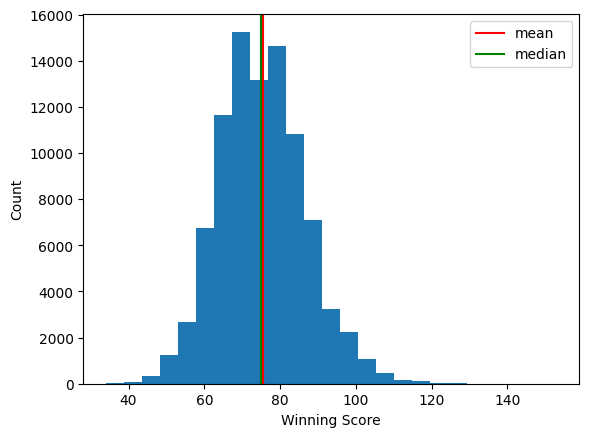

In [15]:
plt.hist(X.wscore, bins=25)
plt.axvline(X.wscore.mean(), color = 'red', label = 'mean')
plt.axvline(X.wscore.median(), color = 'g', label = 'median')
plt.xlabel('Winning Score')
plt.ylabel('Count')
plt.legend()
plt.show()

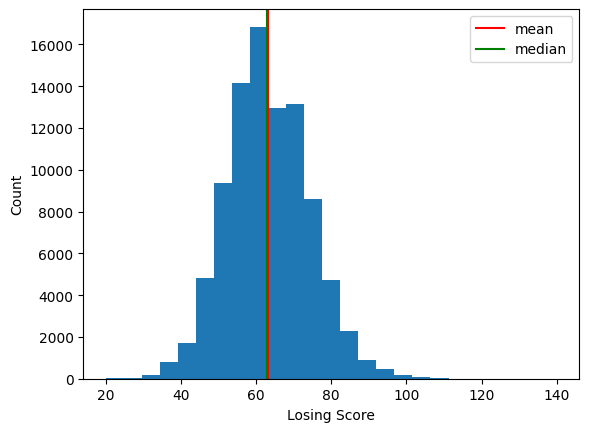

In [16]:
plt.hist(X.lscore, bins=25)
plt.axvline(X.lscore.mean(), color = 'red', label = 'mean')
plt.axvline(X.lscore.median(), color = 'g', label = 'median')
plt.xlabel('Losing Score')
plt.ylabel('Count')
plt.legend()
plt.show()